In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\mohan\Desktop\CA 2\MLOps\Medicinal Leaf Dataset\Medicinal Leaf Dataset\plant_dataset\train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\mohan\Desktop\CA 2\MLOps\Medicinal Leaf Dataset\Medicinal Leaf Dataset\plant_dataset\validation",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\mohan\Desktop\CA 2\MLOps\Medicinal Leaf Dataset\Medicinal Leaf Dataset\plant_dataset\test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1468 images belonging to 30 classes.
Found 183 images belonging to 30 classes.
Found 184 images belonging to 30 classes.


In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))

C:\Users\mohan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,735,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,793,310 (18.29 MB)

 Trainable params: 4,793,310 (18.29 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/10


C:\Users\mohan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.0672 - loss: 3.4576 - val_accuracy: 0.1475 - val_loss: 3.1388
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.1142 - loss: 3.1633 - val_accuracy: 0.2022 - val_loss: 2.8415
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.1849 - loss: 2.8987 - val_accuracy: 0.3279 - val_loss: 2.5322
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.2172 - loss: 2.6576 - val_accuracy: 0.3388 - val_loss: 2.4419
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.3112 - loss: 2.3225 - val_accuracy: 0.3333 - val_loss: 2.1553
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3229 - loss: 2.2049 - val_accuracy: 0.3934 - val_loss: 1.9086
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3409 - loss: 2.2044 - val_accuracy: 0.3770 - val_loss: 2.0679
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3935 - loss: 1.9838 - val_accuracy: 0.3388 - val_loss: 2.2482

6/6 - 6s - 1s/step - accuracy: 0.5000 - loss: 1.5932


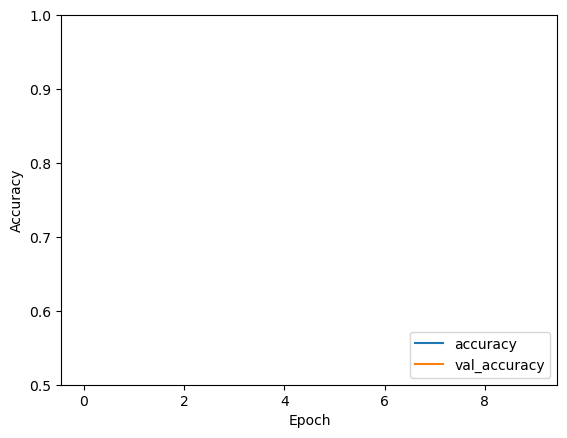

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)

In [9]:
print(test_acc)

0.5
